In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import pandas as pd
import glob
from PIL import Image

In [2]:
#Clase para crear un anillo
class anillo: 
    def __init__(self,name,cond1,cond2):
        self.name=name #Nombre del archivo
        self.thresh,self.reset,self.debajo,self.reset2=cond1 #Rango de conteos por pixel, por debajo y por arriba, y valores nuevos
        self.xprop0,self.xprop1,self.yprop0,self.yprop1=cond2 #Datos de proporcion para los lados de la imagen 
        self.data = np.loadtxt('/Users/mariamorris/Documents/Universidad/Monografía/Datos/Mi_compu_40mW/anillos/LosQueQuiero/{}C.TXT'.format(self.name)) #Ubicación de los datos
        
    #Auxiliary functions

    #Centra el anillo con las proporciones de los datos por parametro
    def center_data(self,data,xprop0,xprop1,yprop0,yprop1): 
        xlim = [int(data.shape[1]*xprop0), int(data.shape[1]*xprop1)]
        ylim = [int(data.shape[0]*yprop0), int(data.shape[0]*yprop1)]
        return data[ylim[0]:ylim[1],xlim[0]:xlim[1]]

    #Hace corte de conteos por pixel por arriba y por abajo
    def threshold(self,data,thresh,reset,debajo,reset2): 
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresh:
                    data[i,j] = reset
                if data[i,j] < debajo:
                    data[i,j] = reset2 
    
    #Hace la imagen del anillo
    def ec(self): 
        data = self.data
        plt.figure()
        #Centering the data
        self.threshold(data,self.thresh,self.reset,self.debajo,self.reset2) #Hace el corte del numero de pixeles
        data = self.center_data(data,self.xprop0,self.xprop1,self.yprop0,self.yprop1) #centra el anillo

        #espacio x y y en donde se ubica la densidad de conteos de la matriz data
        x = np.linspace(0,data.shape[1],data.shape[1]) 
        y = np.linspace(0,data.shape[0],data.shape[0])

        ax = plt.gca() 
        ax.set_aspect("equal")
        plt.contourf(x, y, data, 100)
        #plt.colorbar(label='Intensity (u.a.)')
        ax.set_aspect(1)
        plt.axis('off')
        plt.title(r'$\lambda_p=405.6$nm T={}$^o$C'.format(self.name))
        #Guarda la imagen en la ubicacion deseada 
        plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/anillos/{}C.png'.format(self.name),dpi=600,bbox_inches='tight')

#Hace un gif con todas las imagenes de los anillos
def video(dur):
    fp_in = "/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/anillos/*C.png"
    fp_out = "/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/anillos/video.gif"

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
            save_all=True, duration=dur, loop=0)

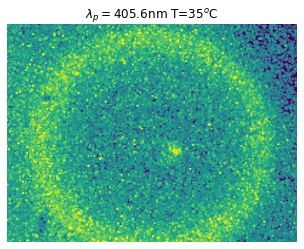

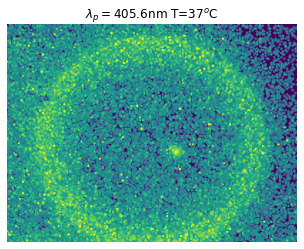

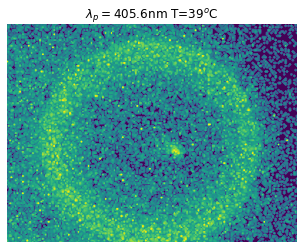

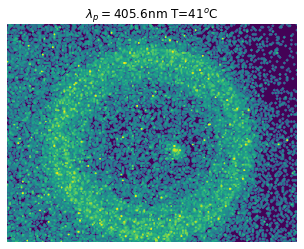

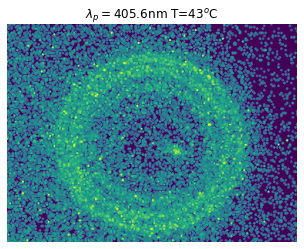

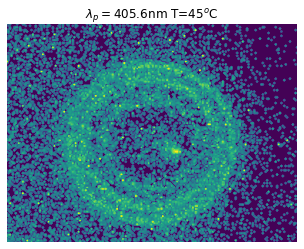

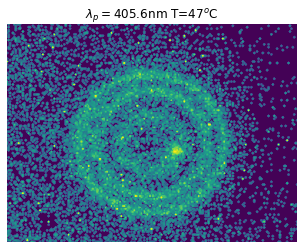

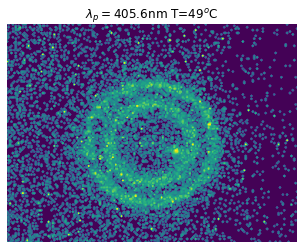

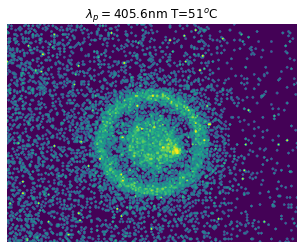

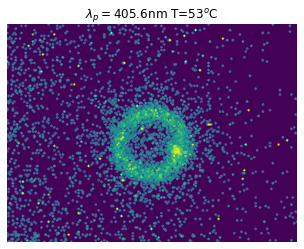

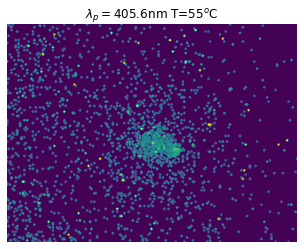

In [3]:
#Condiciones para threshold de datos y centrar el anillo
cond1_1 = [1215,1220,1150,1110] #thresh,reset,debajo,reset2
cond2_1 = [0,0.8,0,0.9] #xprop0,xprop1,yprop0,yprop1

#Hace los objetos de anillos en una lista 
anillos = [anillo(i,cond1_1,cond2_1) for i in range(35,56,2)]
#anillos.extend([anillo(i,cond1,cond2) for i in range(43,56,2)])

#Hace la imagen del anillo para cada objeto
for i in anillos:
    i.ec()


In [4]:
#Hace el video con las imagenes de los anillos
video(450)

(150, 150)

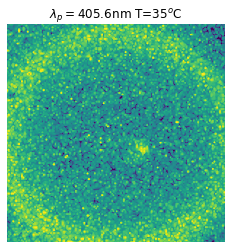

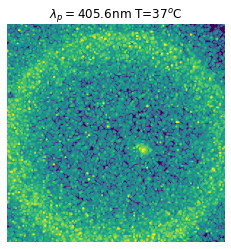

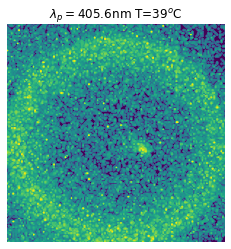

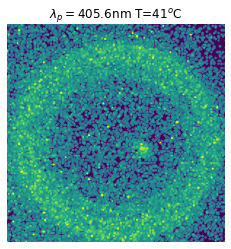

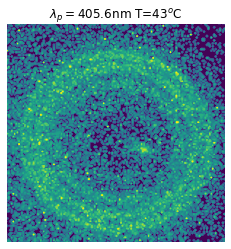

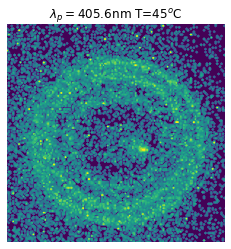

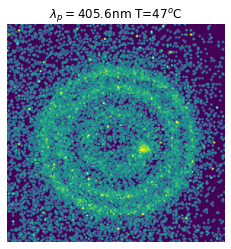

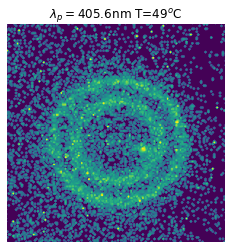

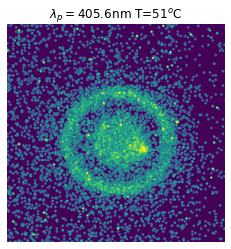

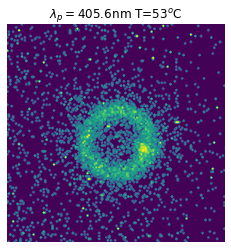

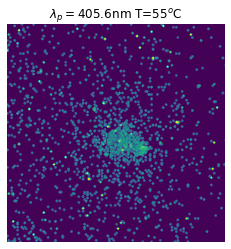

In [5]:
#corte para ver el tamaño del anillo
x0 = 25
x1 = 175
y0 = 0
y1 = 150
#tamaño del sensor 6.9 mm x 4.3 mm
for i in anillos:
    i.ec()
    plt.xlim([x0,x1])
    plt.ylim([y0,y1])
x1-x0,y1-y0


In [6]:
l=20 #distancia en milimetros del cristal
#Medida del angulo de emision de los pares
def angle(x0,x1,y0,y1,l):
    d1 = (x1-x0)*6.9/255
    d2 = (y1-y0)*4.3/170
    print(d1/2,d2/2)
    a = np.arctan((d1/2)/l)#*180/np.pi
    b = np.arctan((d2/2)/l)#*180/np.pi
    return (a+b)/2,a,b
an = angle(60,100,60,100,l)
an

0.5411764705882353 0.5058823529411764


(0.026170473921058826, 0.027052222453228105, 0.02528872538888955)

In [7]:
print(an[0])
a=np.arcsin(np.sin(an[0])/1.96)*180/np.pi
b=np.sin(an[0])/1.96
a

0.026170473921058826


0.7649648423152438

In [8]:
#error propagation
def error(pix,delta_pix,pix1,delta_pix1,l,delta_l,ab,a):
    x1 = np.sqrt(((l/(pix**2+l**2))*delta_pix)**2+((pix/(pix**2+l**2))*delta_l)**2)
    x2 = np.sqrt(((l/(pix1**2+l**2))*delta_pix1)**2+((pix1/(pix1**2+l**2))*delta_l)**2)
    x = np.sqrt((x1/2)**2+(x2/2)**2)
    inter = np.sqrt((np.cos(ab)/1.96*x)**2)
    print(b)
    exter = np.sqrt(((1/(np.sqrt(1-a**2)))*(180/np.pi)*inter)**2)
    return(exter)
error(0.54,0.08,0.51,0.08,20,3,an[0],b)

0.013350758515926228


0.11593406849367263

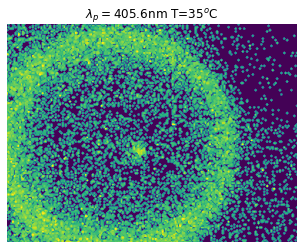

In [9]:
cond1 = [1230,1230,1170,1074] #thresh,reset,debajo,reset2
cond2 = [0.1,0.9,0,0.9] #xprop0,xprop1,yprop0,yprop1
a = anillo(35,cond1,cond2)
a.ec()